## Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.6.0


## Data

In [2]:
# load Fashion MNIST from Keras repo
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() #Tohleto se pouziva jako jednoduche rozdeleni do dvou promennych, vzdy tensor s kolecky a klasifikace do tridy

# add extra dimension (to have one channel)
x_train = x_train[:,:,:,None]
x_test = x_test[:,:,:,None]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [9]:
clothes_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
clothes_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

## Plotting

(<matplotlib.image.AxesImage at 0x7f44f3a28790>, 9)

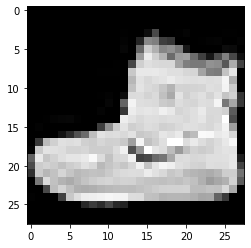

In [14]:
plt.imshow(x_train[0, :, :, 0], cmap = "gray"), y_train[0] # Takhle vkresli konkretni jeden obrazek, cmap vykresli cernobile

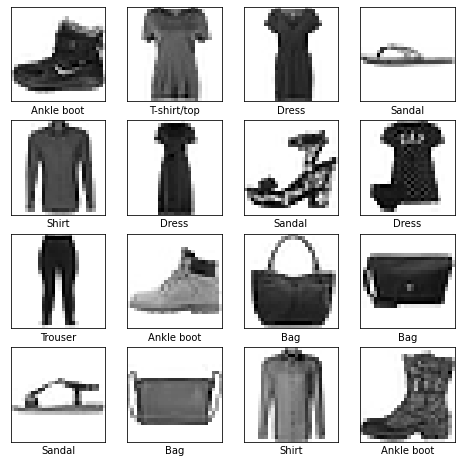

In [16]:
def plot_image(x, title = ""):
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x, cmap=plt.cm.binary)
  plt.xlabel(title)

plt.figure(figsize=(8,8))
for i in range(0, 160, 10):
  plt.subplot(4, 4, i // 10 + 1)
  plot_image(x_train[i].squeeze(), clothes_labels[y_train[i]])


## Dense Neural Network

In [18]:
# Normalize values from [0, 255] to [0, 1] interval
x_train = x_train / 255
x_test = x_test / 255

In [19]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

y_train.shape #60k dims, 10 elements each

(60000, 10)

In [20]:
# T categorical featura
y_train[0], y_train.shape

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32), (60000, 10))

In [21]:
dnn_model = keras.Sequential([
      layers.Flatten(input_shape=(28,28)),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(10, activation='softmax')
])

dnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = dnn_model.fit(
  x_train, y_train,
  batch_size = 256, # pocet obrazku na ktere se v danou chvili diva nase dnn
  epochs = 20, # pocet pruchodu skrze data
  validation_data = (x_test, y_test), # na techto datech pocitame metriky
  verbose = 1
)

Epoch 1/20
235/235 [==============================] - 4s 5ms/step - loss: 0.6102 - accuracy: 0.7896 - val_loss: 0.4732 - val_accuracy: 0.8288
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.4098 - accuracy: 0.8563 - val_loss: 0.4265 - val_accuracy: 0.8441
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3646 - accuracy: 0.8703 - val_loss: 0.3856 - val_accuracy: 0.8624
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.3374 - accuracy: 0.8793 - val_loss: 0.3720 - val_accuracy: 0.8663
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3175 - accuracy: 0.8849 - val_loss: 0.3642 - val_accuracy: 0.8666
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.3027 - accuracy: 0.8898 - val_loss: 0.3673 - val_accuracy: 0.8699
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.2889 - accuracy: 0.8949 - val_loss: 0.3705 - val_accuracy: 0.8667
Epoch 

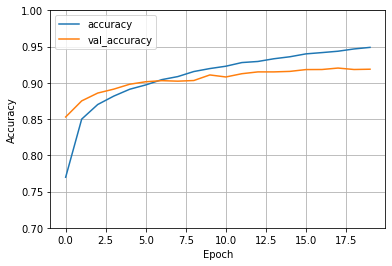

In [28]:
def plot_loss(history, ylim=(0,0.7), xlim = (-1, 19)):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

plot_loss(history, ylim=(0.7, 1))

## Convolutional Neural Network

In [34]:
cnn_model = keras.Sequential([
      layers.Conv2D(input_shape=(28,28,1), filters = 16, kernel_size = (3,3), activation = 'relu'),
      layers.Dropout(0.5),
      layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu'),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.3),
      layers.Dense(10, activation='softmax')
])

cnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
dropout_6 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

In [35]:
history = cnn_model.fit(
  x_train, y_train,
  batch_size = 256,
  epochs = 20,
  validation_data = (x_test, y_test),
  verbose = 1
)

Epoch 1/20
235/235 [==============================] - 5s 17ms/step - loss: 0.6136 - accuracy: 0.7815 - val_loss: 0.4352 - val_accuracy: 0.8438
Epoch 2/20
235/235 [==============================] - 4s 16ms/step - loss: 0.4069 - accuracy: 0.8536 - val_loss: 0.3535 - val_accuracy: 0.8704
Epoch 3/20
235/235 [==============================] - 4s 16ms/step - loss: 0.3493 - accuracy: 0.8739 - val_loss: 0.3202 - val_accuracy: 0.8840
Epoch 4/20
235/235 [==============================] - 4s 16ms/step - loss: 0.3142 - accuracy: 0.8855 - val_loss: 0.3029 - val_accuracy: 0.8867
Epoch 5/20
235/235 [==============================] - 4s 16ms/step - loss: 0.2860 - accuracy: 0.8944 - val_loss: 0.2854 - val_accuracy: 0.8950
Epoch 6/20
235/235 [==============================] - 4s 16ms/step - loss: 0.2648 - accuracy: 0.9025 - val_loss: 0.2911 - val_accuracy: 0.8952
Epoch 7/20
235/235 [==============================] - 4s 16ms/step - loss: 0.2491 - accuracy: 0.9080 - val_loss: 0.2720 - val_accuracy: 0.9008

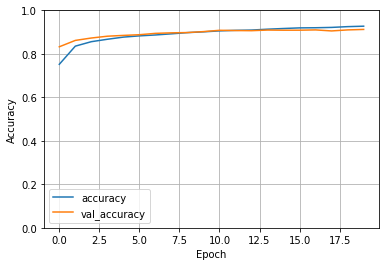

In [33]:
plot_loss(history, ylim=(0, 1))